UNDERSTANDING OF DATA AND LIBRARIES

In [171]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [172]:
# Import necessary libraries
from sklearn.model_selection import train_test_split 
# Import missing module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
# Load the dataset
df = pd.read_csv(r'C:\Users\ASUS\Desktop\Deep Learning for Resume Analysis and Adaptive Selection Criteria A Comprehensive Study on Enhancing Recruitment Processes\Dataset\UpdatedResumeDataSet.csv')

In [174]:
print(df.columns)

Index(['Category', 'Resume'], dtype='object')


In [175]:
print(df.head)

<bound method NDFrame.head of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>


In [176]:
categories = df['Category'].value_counts().reset_index()
print(categories)

                        index  Category
0              Java Developer        84
1                     Testing        70
2             DevOps Engineer        55
3            Python Developer        48
4               Web Designing        45
5                          HR        44
6                      Hadoop        42
7                  Blockchain        40
8               ETL Developer        40
9          Operations Manager        40
10               Data Science        40
11                      Sales        40
12        Mechanical Engineer        40
13                       Arts        36
14                   Database        33
15     Electrical Engineering        30
16         Health and fitness        30
17                        PMO        30
18           Business Analyst        28
19           DotNet Developer        28
20         Automation Testing        26
21  Network Security Engineer        25
22              SAP Developer        24
23             Civil Engineer        24


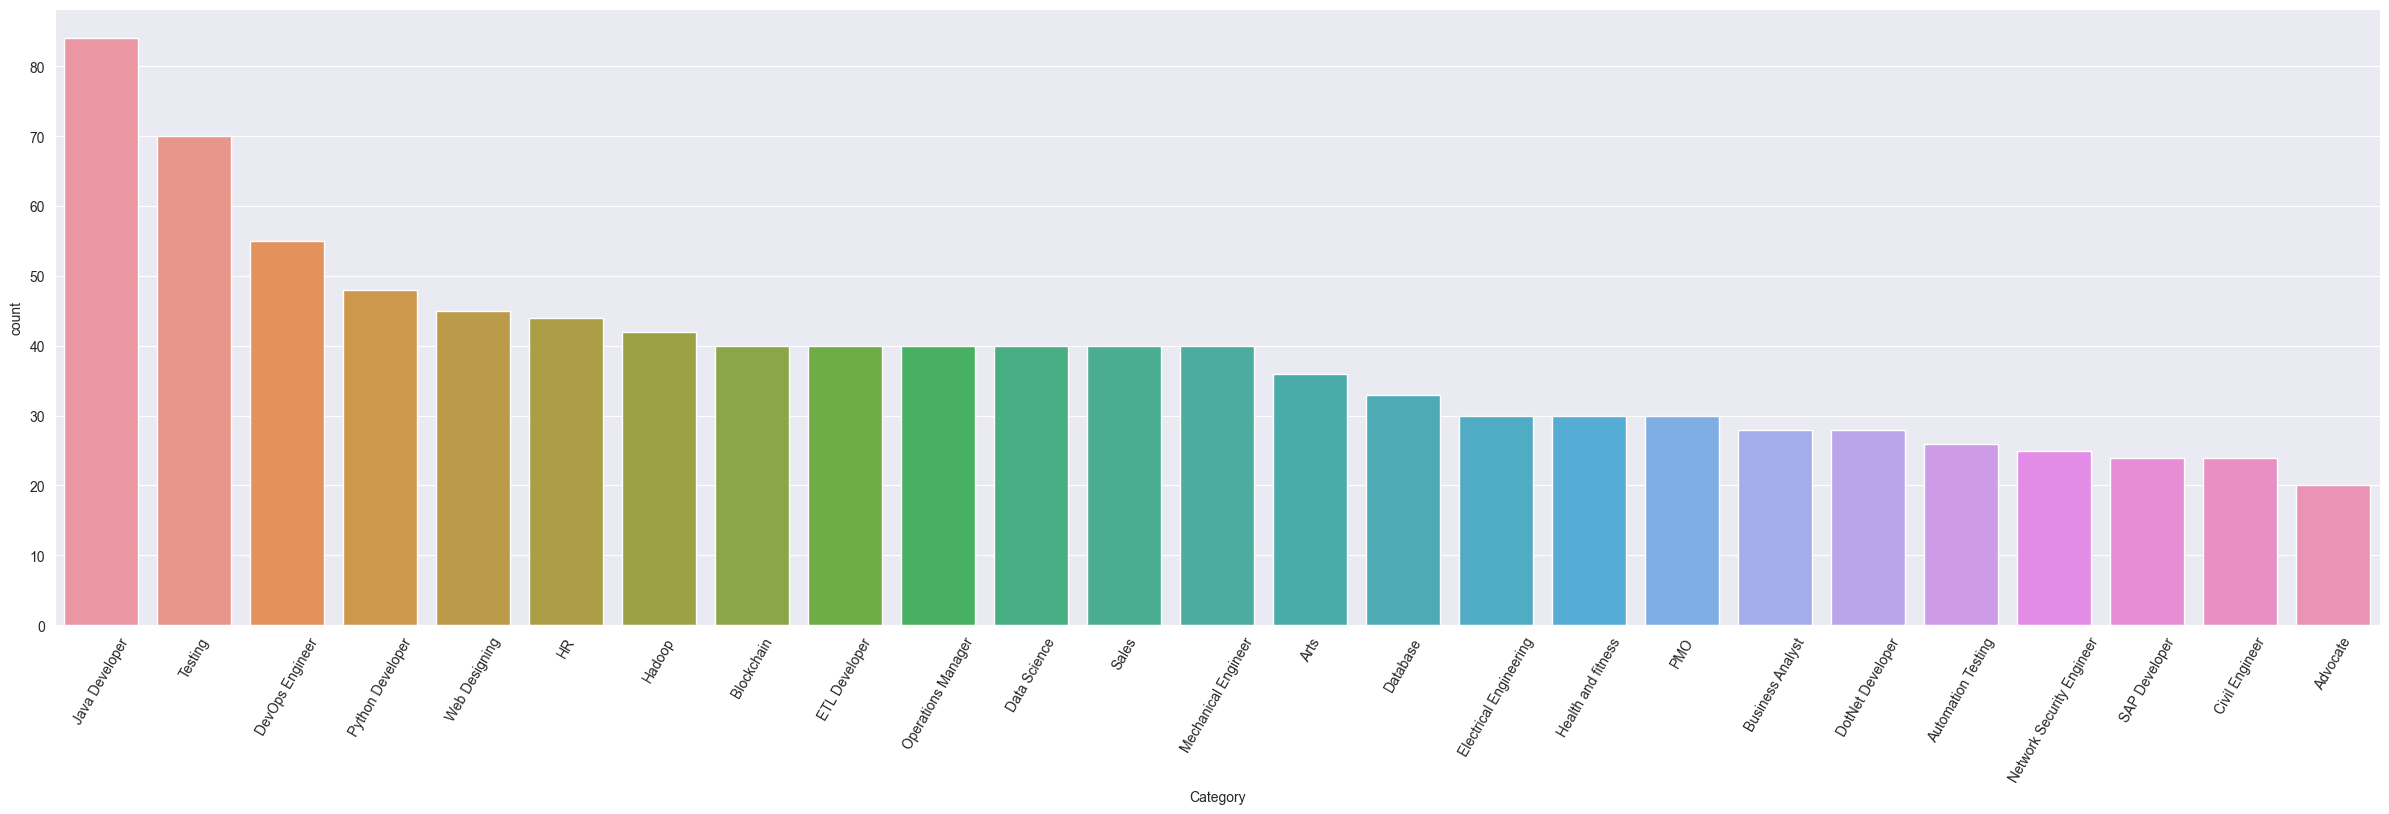

In [177]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)

# Show the plot
plt.show()

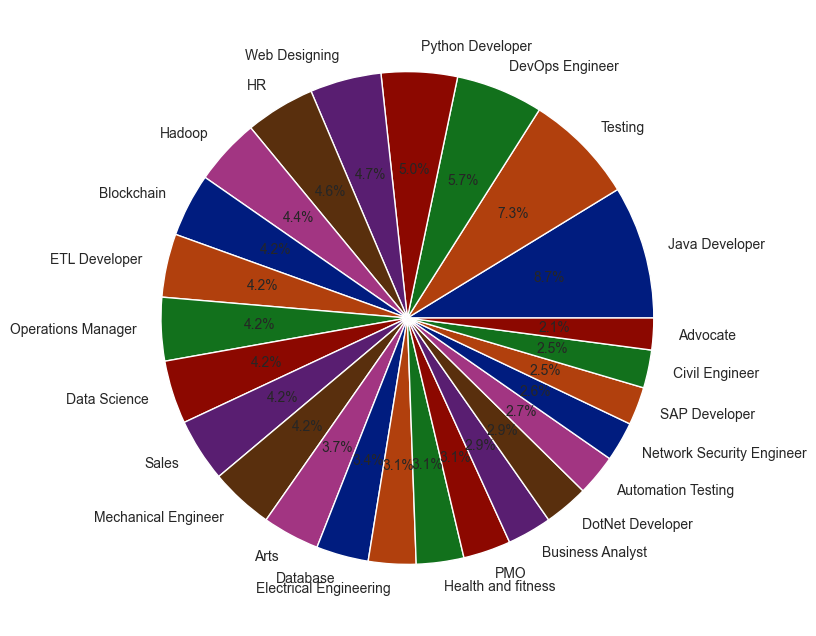

In [178]:
plt.figure(figsize=(30,8))

#define Seaborn color palette to use
colors= sns.color_palette('dark')[0:7]

#create pie chart
plt.pie(categories['Category'], labels= categories['index'], colors = colors, autopct='%.1f%%')
plt.show()

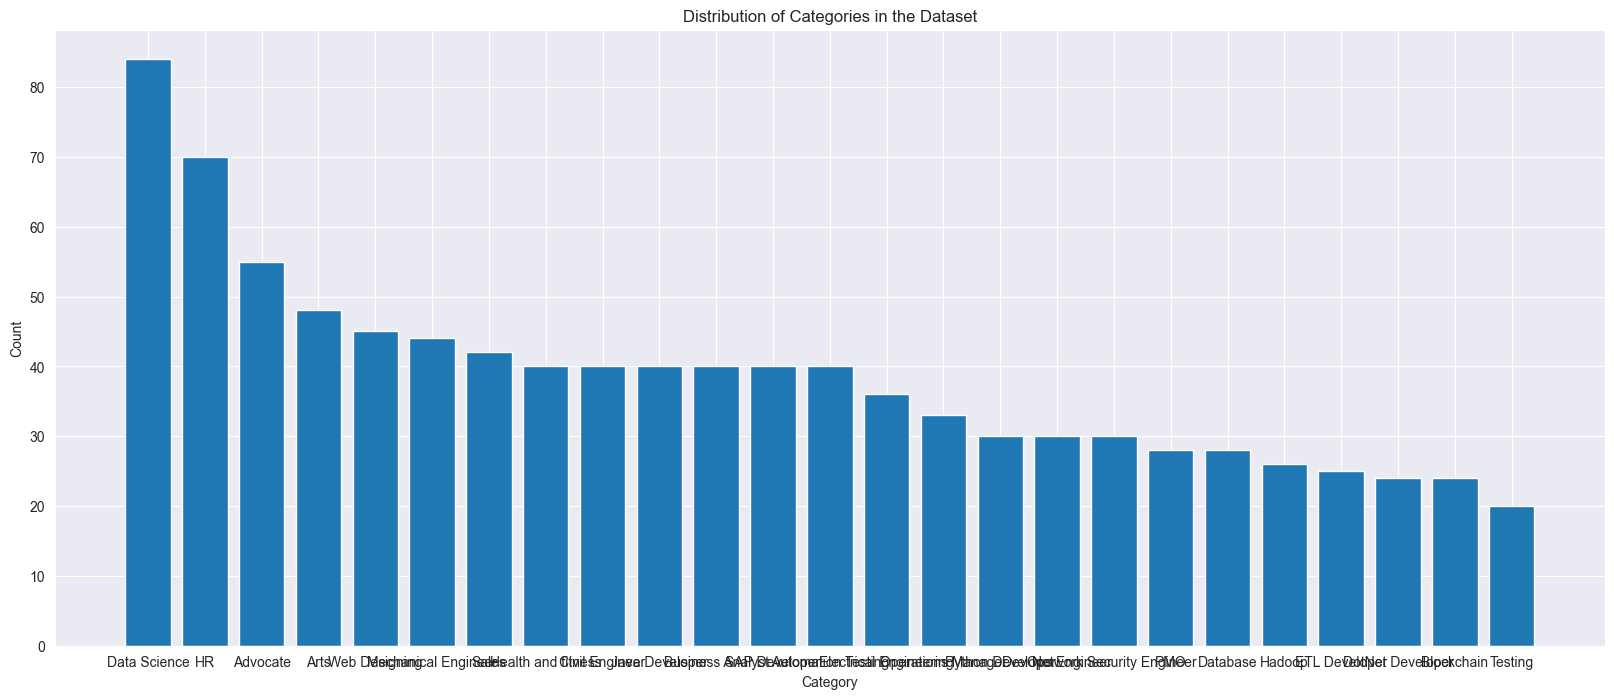

In [179]:
# Create a bar graph to represent the distribution of categories in the dataset
categories = df['Category'].unique().tolist()
category_counts = df['Category'].value_counts().tolist()

plt.figure(figsize=(20, 8))
plt.bar(categories, category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in the Dataset')
plt.show()

NOW TURN FOR WORD CLOUD 

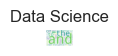

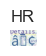

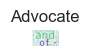

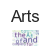

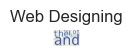

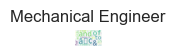

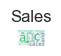

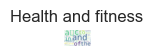

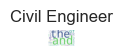

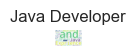

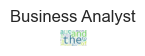

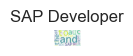

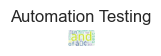

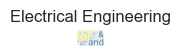

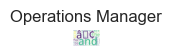

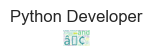

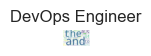

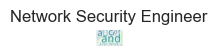

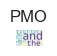

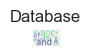

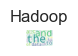

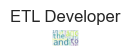

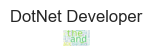

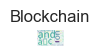

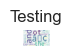

In [180]:

from wordcloud import WordCloud
from collections import Counter
import matplotlib as mpl


#for the types of job and word count in it 
def resume_wordcloud(df, column='Resume'):
    for i, cat in enumerate(df['Category'].unique()):
        resumes = df[df['Category'] == cat][column].tolist()
        word_list = ' '.join(resumes).split()
        word_counts = Counter(word_list)
        wordcloud = WordCloud(background_color='white', width=400, height=250).generate_from_frequencies(word_counts)
        plt.figure(figsize=(10, 10))
        plt.subplot(1, len(df['Category'].unique()), i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(cat)
        plt.axis('off')
    plt.subplots_adjust(hspace=0.4) # Add some space between the plots
    plt.show()


#we are here encounterd with fig max problem we will solve it with 
mpl.rcParams['figure.max_open_warning'] = 0
# Assuming you have a dataframe df with columns ['Category', 'Resume']
resume_wordcloud(df)




DATA PREPROCESSING 


In [181]:
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [182]:
import re

def clean_resume_text(resume_text):
    # Remove URLs
    resume_text = re.sub(r'http\S+\s*', ' ', resume_text)

    # Remove RT and cc
    resume_text = re.sub(r'RT|cc', ' ', resume_text)

    # Remove hashtags
    resume_text = re.sub(r'#\S+', '', resume_text)

    # Remove mentions
    resume_text = re.sub(r'@\S+', ' ', resume_text)

    # Remove punctuations
    resume_text = re.sub(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', resume_text)

    # Remove non-ASCII characters
    resume_text = re.sub(r'[^\x00-\x7f]', ' ', resume_text)

    # Remove extra whitespace
    resume_text = re.sub(r'\s+', ' ', resume_text)

    return resume_text.strip()

# Example usage:
input_resume_text = "Your input text here"
cleaned_resume_text = clean_resume_text(input_resume_text)
print(cleaned_resume_text)


Your input text here


In [183]:
#APPLY TO COLUMN
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_resume_text(x))
df1.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary..."


MODEL DEVELOPING


In [22]:
import pandas as pd
from scipy.sparse import vstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('cleaned_resume_dataset.csv')

# Assuming the correct column names are 'resume_text' and 'category'
X = data['cleaned_resume']
y = data['Category']

# Convert text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Create WordCloud and convert to numerical features using TfidfVectorizer
all_text = ' '.join(data['cleaned_resume'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
wordcloud_features = vectorizer.transform([all_text])

# Convert wordcloud_features to a sparse matrix
wordcloud_features_sparse = wordcloud_features.tocsr()

# Add wordcloud features as additional rows
X_combined = vstack([X_vectorized, wordcloud_features_sparse])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train models
model_list = [OneVsRestClassifier(model) for model in models.values()]

for model in model_list:
    model.fit(X_train, y_train)
    print(f'{model} trained')

print("*" * 60)
print("All models trained")

# Evaluate models
for model in model_list:
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Accuracy of {model} on training set: {train_accuracy}")
    print(f"Accuracy of {model} on test set: {test_accuracy}")
    print("*" * 100)

# Classification reports
for model in model_list:
    print(f'{model} classification report')
    print("-" * 80)
    print(classification_report(y_test, model.predict(X_test)))
    print("*" * 100)
    print(" ")


ValueError: Found input variables with inconsistent numbers of samples: [963, 962]

TESTING ON SYNTHETIC DATASET

In [192]:
import pandas as pd
import numpy as np
from faker import Faker
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Generate synthetic resumes using Faker
fake = Faker()
num_synthetic_resumes = 10
synthetic_resumes = [fake.paragraph() for _ in range(num_synthetic_resumes)]

# Create a DataFrame with synthetic data
synthetic_df = pd.DataFrame({'Resume': synthetic_resumes})

# Assuming 'df' is your original DataFrame containing 'Category'
synthetic_df['Category'] = np.random.choice(['True', 'False'], size=num_synthetic_resumes)

# Tokenize and preprocess synthetic data
synthetic_corpus = synthetic_df['Resume'].tolist()
synthetic_labels = synthetic_df['Category'].apply(lambda x: 1 if x == 'True' else 0).tolist()
synthetic_labels = np.array(synthetic_labels)

synthetic_sequences = tokenizer.texts_to_sequences(synthetic_corpus)
synthetic_data_padded = pad_sequences(synthetic_sequences, maxlen=max_len)

# Evaluate the model on synthetic data
synthetic_loss, synthetic_accuracy = model.evaluate(synthetic_data_padded, synthetic_labels)
print(f'Accuracy on synthetic data: {synthetic_accuracy * 100:.2f}%')


1/1 [==============================] - 0s 49ms/step - loss: 0.3251 - accuracy: 0.9000
Accuracy on synthetic data: 90.00%


RESULTS AND ACCURACY 

In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,classification_report

# Predictions
y_pred_prob = model.predict(x_train)
threshold = 0.5  # You can adjust the threshold as needed
y_pred = (y_pred_prob > threshold).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Additional Metrics
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, zero_division=1)  # Setting zero_division parameter
sensitivity = recall_score(y_train, y_pred, zero_division=1)  # Setting zero_division parameter

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Sensitivity (Recall):", sensitivity)

# Classification Report
print("Classification Report:")
print(classification_report(y_train, y_pred, zero_division=1))  # Setting zero_division parameter


25/25 [==============================] - 1s 20ms/step
Confusion Matrix:
[[769]]
Accuracy: 1.0
F1 Score: 1.0
Sensitivity (Recall): 1.0
Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [193, 769]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities on test set
y_pred_prob = model.predict(x_test)

# Threshold probabilities to get binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
